In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt



class Node:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.visits = 0
        self.score = 0

    def expand(self):
        actions = range(env.action_space.n)
        for action in actions:
            next_state, reward, done, _, _ = env.step(action)
            child = Node(next_state, self)
            self.children.append(child)

    def select_child(self):
        exploration_constant = 1.4
        epsilon = 1e-6  # small constant to prevent division by zero
        scores = [child.score / (child.visits + epsilon) + exploration_constant * np.sqrt(2 * np.log(self.visits + epsilon) / (child.visits + epsilon)) for child in self.children]
        return self.children[np.argmax(scores)]

    def simulate(self):
        total_reward = 0
        state = env.reset()  # Reset the environment at the beginning of each simulation
        while True:
            action = env.action_space.sample()
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        return total_reward

    def backpropagate(self, reward):
        node = self
        while node is not None:
            node.visits += 1
            node.score += reward
            node = node.parent

scores = []  # List to keep track of scores
def mcts_search(env, iterations):
    root = Node(env.reset())
    
    for _ in range(iterations):
        node = root
        while len(node.children) > 0:
            node = node.select_child()
        if node.visits == 0:
            node.expand()
        reward = node.simulate()
        node.backpropagate(reward)
        scores.append(node.score)  # Append the score of the node to the list
    best_child = max(root.children, key=lambda child: child.visits)
    return np.argmax(best_child.state), scores  # Return the scores along with the best action


# Create the Space Invaders environment
env = gym.make('SpaceInvaders-v4', render_mode="human")
#env = gym.make('SpaceInvaders-v4')

# Run the MCTS algorithm for 1000 iterations and 10 
total_scores = []
for _ in range(1):
    best_action, game_scores = mcts_search(env, 100)
    total_scores.append(game_scores[-1])  # Append the final score of each game to total_scores

# Assuming you have a list of scores for each iteration

# Calculate the moving average
window_size = 3
moving_average = [sum(scores[i:i+window_size]) / window_size for i in range(len(scores) - window_size + 1)]

# Plot the scores and moving average
plt.plot(total_scores, label='Score')
#plt.plot(range(window_size-1, len(total_scores)), moving_average, label='Moving Average')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()




: 

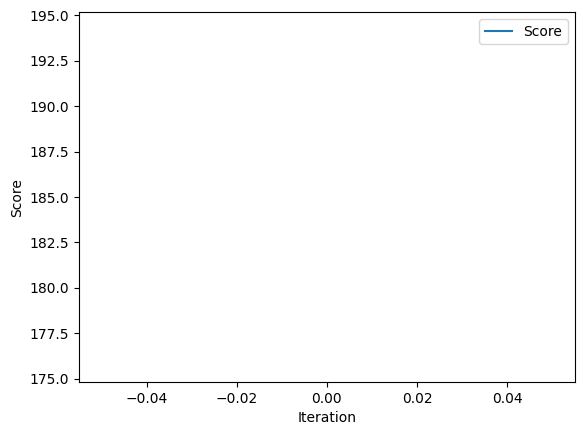

In [5]:
# Calculate the moving average
moving_average = [sum(scores[i:i+window_size]) / window_size for i in range(len(scores) - window_size + 1)]

# Plot the scores and moving average
plt.plot(total_scores, label='Score')
#plt.plot(range(window_size-1, len(total_scores)), moving_average, label='Moving Average')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()